In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 25, 'legend.handlelength'  : 1.25})
plt.rcParams['image.cmap'] = 'RdBu_r'
%matplotlib inline

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 24 days


In [2]:
from pyqg import qg_model
year = 24*60*60*360.
# Set up a model which will run for 20 years and start averaging after 10 years.
# There are lots of parameters that can be specified as keyword arguments
# but we are just using the defaults.
m = qg_model.QGModel(tmax=20*year, tavestart=10*year)
# run it
m.run()

t=               0, tc=         0: cfl=0.011703, ke=0.000002900, T_e=1039.844665295
t=         7200000, tc=      1000: cfl=0.011692, ke=0.000002900, T_e=1039.844665295
t=        14400000, tc=      2000: cfl=0.011707, ke=0.000000364, T_e=1586.432219696
t=        21600000, tc=      3000: cfl=0.011708, ke=0.000000688, T_e=1297.325086646
t=        28800000, tc=      4000: cfl=0.011739, ke=0.000001511, T_e=975.785797917
t=        36000000, tc=      5000: cfl=0.011760, ke=0.000003671, T_e=676.628638314
t=        43200000, tc=      6000: cfl=0.014211, ke=0.000009499, T_e=441.219607098
t=        50400000, tc=      7000: cfl=0.025327, ke=0.000025525, T_e=276.710126479
t=        57600000, tc=      8000: cfl=0.044362, ke=0.000070188, T_e=169.613101910
t=        64800000, tc=      9000: cfl=0.065229, ke=0.000195256, T_e=102.458505283
t=        72000000, tc=     10000: cfl=0.081891, ke=0.000402756, T_e=64.526333946
t=        79200000, tc=     11000: cfl=0.090867, ke=0.000489783, T_e=55.935291236
t=

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 24 days


## Example of plots

#### KE time series

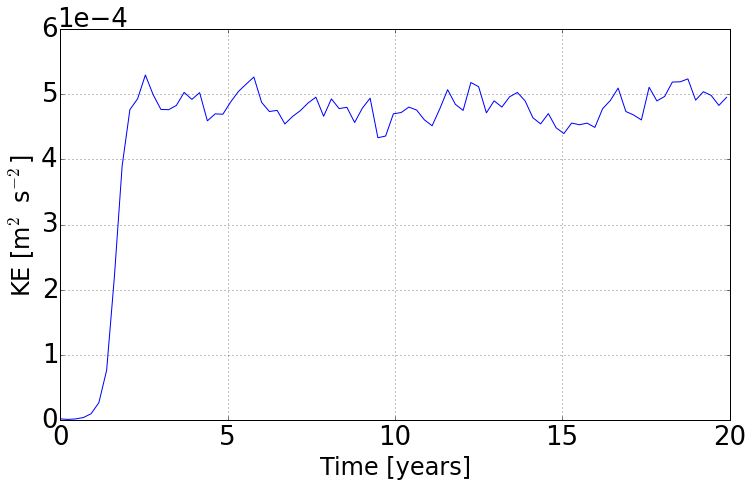

In [3]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
ax.plot(m.time/year,m.ke)
ax.set_xlabel('Time [years]')
ax.set_ylabel(r'KE [m$^2$ s$^{-2}$]')
ax.ticklabel_format(axis='y',style = 'sci', scilimits=(-2,2))
plt.grid()

## The QG potential vorticities in physical space

In [4]:
q1 = m.q1 + m.beta1*m.y
q2 = m.q2 + m.beta2*m.y

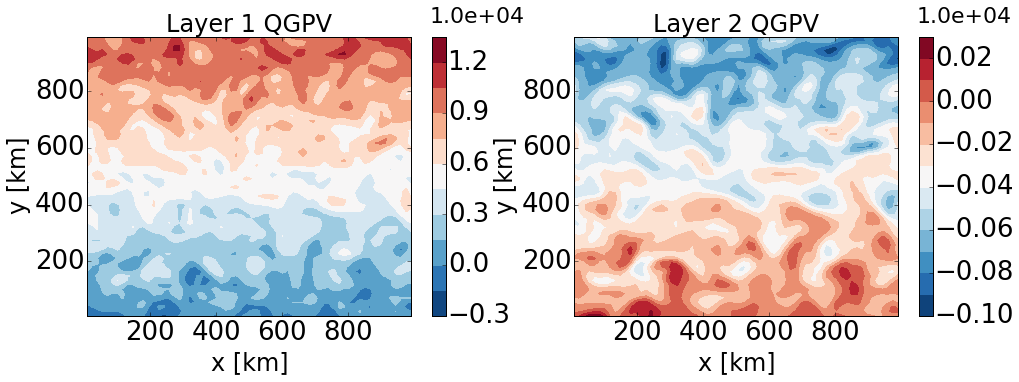

In [5]:
X, Y = m.x/1e3, m.y/1e3 # give units in km
pv_factor = 1.e4
factor_s = str('%1.1e') %pv_factor

fig = plt.figure(figsize=(16.,5.))
ax1 = fig.add_subplot(121)
cf1 = ax1.contourf(X, Y, pv_factor*q1, 12)
cb1 = fig.colorbar(cf1)
cb1.ax.text(.0,1.05,factor_s,rotation=0,fontsize=22)
ax1.set_xlabel('x [km]')
ax1.set_ylabel('y [km]')
ax1.set_title('Layer 1 QGPV')
ax2 = fig.add_subplot(122)
cf2 = ax2.contourf(X, Y, pv_factor*q2, 12)
cb2 = fig.colorbar(cf2)
ax2.set_title('Layer 2 QGPV')
cb2.ax.text(.0,1.05,factor_s,rotation=0,fontsize=22)
ax2.set_xlabel('x [km]')
ax2.set_ylabel('y [km]')

## KE spectra and Energy budget

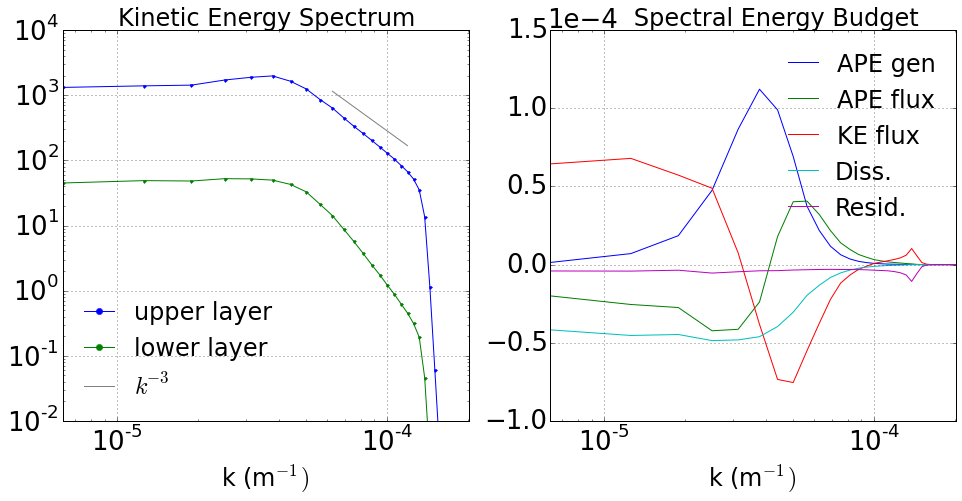

In [6]:
# some spectral plots
KE1spec = m.get_diagnostic('KE1spec').sum(axis=0)   # note that this is misleading for anisotrphic flows...
KE2spec = m.get_diagnostic('KE2spec').sum(axis=0)   #  we should sum azimuthaly, and plot as a functions of kappa 
                                                
# factor ebud
ebud_factor = 1.e4
ebud_factor_s= str('%1.1e') %ebud_factor

# inertial range
ir = np.r_[10:20]


fig = plt.figure(figsize=(16.,7.))
ax1 = fig.add_subplot(121)
ax1.loglog( m.kk, KE1spec, '.-' )
ax1.loglog( m.kk, KE2spec, '.-' )
ax1.loglog( m.kk[10:20], 2*(m.kk[ir]**-3) *
                         KE1spec[ir].mean() / (m.kk[ir]**-3).mean(),
                         '0.5')
ax1.set_ylim([1e-2,1e4])
ax1.set_xlim([m.kk.min(), m.kk.max()])
ax1.grid()
ax1.legend(['upper layer','lower layer', r'$k^{-3}$'],
       loc='lower left')
ax1.set_xlabel(r'k (m$^{-1})$')
ax1.set_title('Kinetic Energy Spectrum')

# the spectral energy budget
ebud = [ m.get_diagnostic('APEgenspec').sum(axis=0),
         m.get_diagnostic('APEflux').sum(axis=0),
         m.get_diagnostic('KEflux').sum(axis=0),
         -2*m.rek*m.del2*m.get_diagnostic('KE2spec').sum(axis=0)]
ebud.append(-np.vstack(ebud).sum(axis=0))
ebud_labels = ['APE gen','APE flux','KE flux','Diss.','Resid.']

ax2 = fig.add_subplot(122)
[ax2.semilogx(m.kk, term) for term in ebud]
ax2.legend(ebud_labels, loc='upper right')

ax2.grid()
ax2.set_xlim([m.kk.min(), m.kk.max()])
ax1.set_xlabel(r'k (m$^{-1})$')
ax2.ticklabel_format(axis='y',style = 'sci', scilimits=(-2,2))
ax2.set_title(r'      Spectral Energy Budget')

ax2.set_xlabel(r'k (m$^{-1})$')